In [30]:
import numpy as np
import matplotlib.pyplot as plt


percentiles = [10, 25, 50, 75, 90, 98, 99]
values = [52.38, 52.57, 53.24, 54.72, 55.39, 55.75, 55.78]
target_average = 53.81

data = np.interp(np.linspace(0, 100, 100000), percentiles, values)
#检查data的均值
print(data.mean())
data.sort()

# 计算生成数据的各个分位数
calculated_percentiles = np.percentile(data, percentiles)

# 打印计算出的分位数
print("目标分位数值:", values)
print("计算出的分位数值:", calculated_percentiles)
#打印均值
print("目标均值:", target_average)
print("计算出的均值:", data.mean())

53.64980430204302
目标分位数值: [52.38, 52.57, 53.24, 54.72, 55.39, 55.75, 55.78]
计算出的分位数值: [52.38000114 52.57000265 53.2400081  54.71999727 55.39000003 55.74999971
 55.7799997 ]
目标均值: 53.81
计算出的均值: 53.64980430204302


In [33]:
#打印data的数量
print(len(data))
print(abs(target_average - data.mean()))
average_error = target_average - data.mean()
average_add = average_error / 100000
#将average_add加到data上,每个元素都加
final_data = data + average_error
print(final_data.mean())

100000
0.1601956979569792
53.81


In [35]:
print(np.percentile(final_data, percentiles))

[52.54019684 52.73019835 53.4002038  54.88019297 55.55019573 55.9101954
 55.9401954 ]


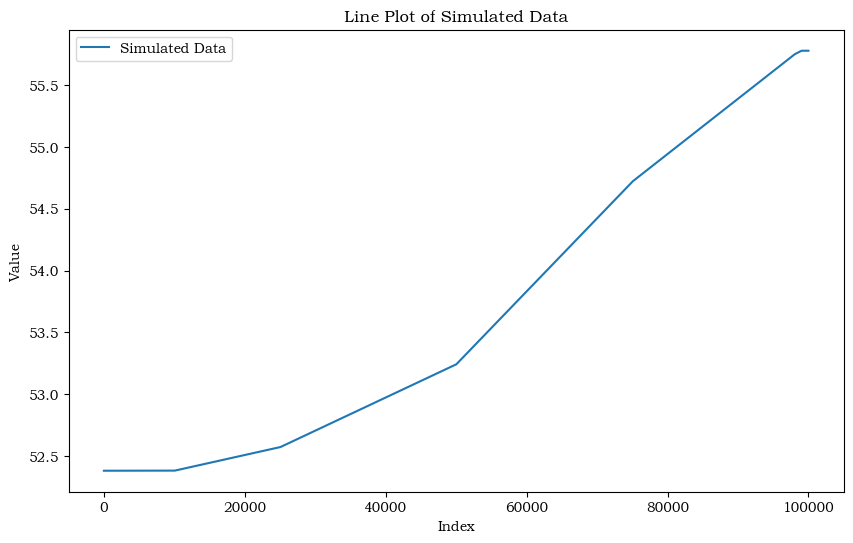

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(data, label='Simulated Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Simulated Data')
plt.legend()
plt.show()

原始数据均值: 53.64980430204302
调整后数据均值: 53.649805904000004
目标分位数值: [52.38, 52.57, 53.24, 54.72, 55.39, 55.75, 55.78]
计算出的分位数值: [52.38001602 52.57000265 53.2400081  54.71999727 55.39000003 55.74999971
 55.7799997 ]


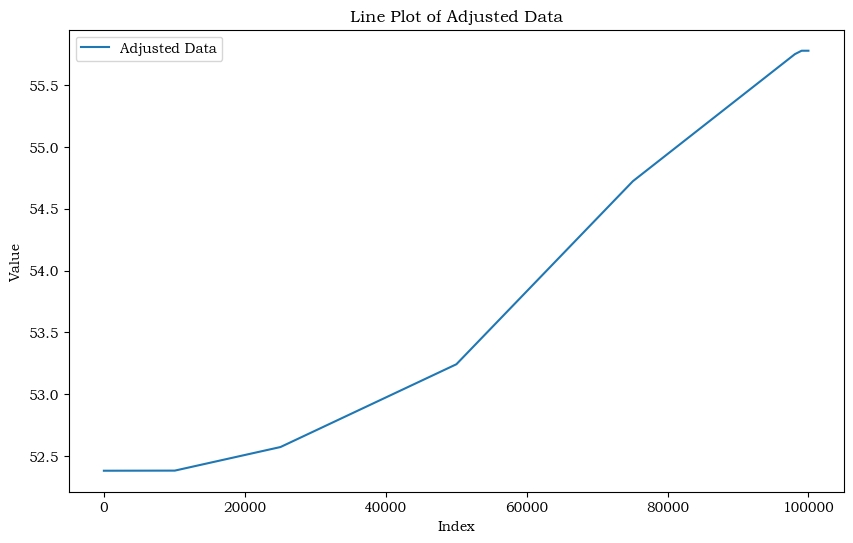

In [37]:
import numpy as np
import matplotlib.pyplot as plt

percentiles = [10, 25, 50, 75, 90, 98, 99]
values = [52.38, 52.57, 53.24, 54.72, 55.39, 55.75, 55.78]
target_average = 53.81

data = np.interp(np.linspace(0, 100, 100000), percentiles, values)
print("原始数据均值:", data.mean())

# 计算当前均值和目标均值之间的差异
average_error = target_average - data.mean()

# 将差异均匀分配到数据的某些部分上
adjustment_indices = np.random.choice(len(data), size=int(len(data) * 0.1), replace=False)
data[adjustment_indices] += average_error / len(adjustment_indices)

print("调整后数据均值:", data.mean())

# 计算生成数据的各个分位数
calculated_percentiles = np.percentile(data, percentiles)

# 打印计算出的分位数
print("目标分位数值:", values)
print("计算出的分位数值:", calculated_percentiles)

# 绘制调整后的数据
plt.figure(figsize=(10, 6))
plt.plot(data, label='Adjusted Data')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of Adjusted Data')
plt.legend()
plt.show()

调整后数据均值: 53.63034960427052
目标分位数值: [52.38, 52.57, 53.24, 54.72, 55.39, 55.75, 55.78]
计算出的分位数值: [52.38014939 52.57009223 53.24007189 54.72008387 55.3901303  55.75025611
 55.78179729]


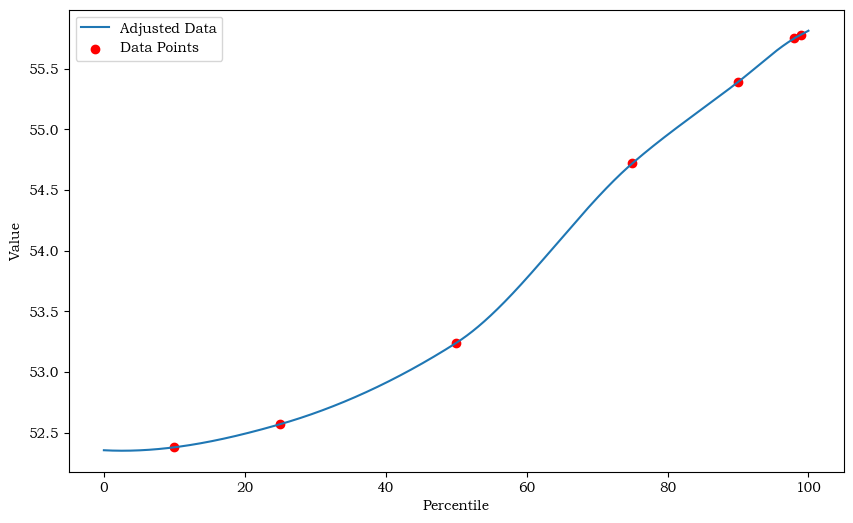

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import PchipInterpolator

# 给定的分位数和对应的值
percentiles = [10, 25, 50, 75, 90, 98, 99]
values = [52.38, 52.57, 53.24, 54.72, 55.39, 55.75, 55.78]
target_average = 53.81

# 生成插值位置
x_new = np.linspace(0, 100, 100000, dtype=np.float64)

# 创建 PCHIP 插值对象
pchip = PchipInterpolator(percentiles, values)

# 初始插值数据
data = pchip(x_new)

# 多次迭代调整数据
for _ in range(10):  # 迭代次数
    average_error = target_average - np.mean(data)
    percentile_indices = [0] + [int(p / 100 * len(data)) for p in percentiles] + [len(data)]
    for i in range(len(percentile_indices) - 1):
        start_index = percentile_indices[i]
        end_index = percentile_indices[i + 1]
        adjustment_indices = np.arange(start_index, end_index)
        data[adjustment_indices] += average_error / len(adjustment_indices)

# 打印调整后的均值
print("调整后数据均值:", np.mean(data))

# 计算生成数据的各个分位数
calculated_percentiles = np.percentile(data, percentiles)

# 打印计算出的分位数
print("目标分位数值:", values)
print("计算出的分位数值:", calculated_percentiles)

# 绘制调整后的数据
plt.figure(figsize=(10, 6))
plt.plot(x_new, data, label='Adjusted Data')
plt.scatter(percentiles, values, color='red', label='Data Points')
plt.xlabel('Percentile')
plt.ylabel('Value')
plt.legend()
plt.show()

In [2]:
#保存数据为csv
df = pd.DataFrame(data, columns=['Value'])
df.to_excel('Hongkong_Tokyo.xlsx', index=False)